In [8]:
import pandas as pd

In [1]:
import os
%pwd

'e:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\winequality_prediction\\src\\WineQualityPrediction\\EDA'

In [5]:
os.chdir('../')

In [6]:
%pwd

'e:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\winequality_prediction'

In [9]:
data = pd.read_csv('artifacts\data_ingestion\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality'>

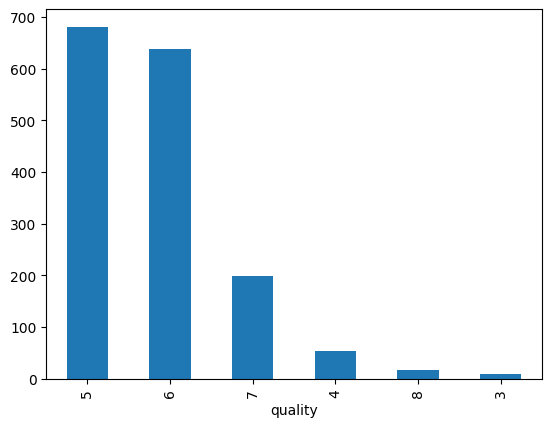

In [11]:
data['quality'].value_counts().plot(kind='bar')

In [12]:
X = data.drop('quality', axis=1)
y = data['quality']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {pd.Series(y_resampled).value_counts()}")


Original dataset shape: quality
5    551
6    506
7    157
4     43
8     13
3      9
Name: count, dtype: int64
Resampled dataset shape: quality
6    551
5    551
4    551
7    551
8    551
3    551
Name: count, dtype: int64


In [16]:
%pwd

'e:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\winequality_prediction'

In [17]:
X = pd.read_csv('artifacts\data_transformation\X.csv')
y = pd.read_csv('artifacts\data_transformation\y.csv')

In [18]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# load model
import pickle

model = pickle.load(open('artifacts/model_trainer/best_model.pkl', 'rb'))

# predict
y_pred = model.predict(X_test_scaled)

# evaluate
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       201
           1       0.91      0.98      0.94       149
           2       0.93      0.80      0.86        54
           3       0.91      0.67      0.77        30
           4       0.96      0.96      0.96       150
           5       0.98      0.98      0.98       146

    accuracy                           0.95       730
   macro avg       0.95      0.90      0.92       730
weighted avg       0.95      0.95      0.95       730

